# Demonstration of GenDa-Lens

This notebook demonstrates how to run different bias tests in GenDa-Lens. Specifically, this will examplify how to run the code examples provided in the thesis (that proposed GenDa-Lens).

For documentation of the package, see: https://dadebias.github.io/genda-lens/
For GitHub repo, see: https://github.com/DaDebias/genda-lens

First, install the package via pip:

In [1]:
!pip install genda-lens==0.0.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.5 MB/s eta 0:00:00:00:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 2.4 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 51.7 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 kB 445.8 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 627.2 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 49.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.0/235.0 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 25.2 MB/s eta 0:00:00:00:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 30.1 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.1/46.1 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 913.3/913.3 kB 10.5 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Next, specify the name of the model to be evaluated. Specifically, tprovide the Hugging Face name of the model, and it will be fetched and evaluated.

Below is a list of all the models tested in the proof of concept in the master's thesis.

In [2]:
#LM models
#model_name = "Maltehb/danish-bert-botxo"
model_name = "NbAiLab/nb-bert-base"
#model_name = "xlm-roberta-large"

#NER models
#model_name = "alexandrainst/da-ner-base"
#model_name = "saattrupdan/nbailab-base-ner-scandi"
#model_name = "da_dacy_large_trf-0.2.0"

Then, import and instantiate the Evaluator:

In [3]:
from genda_lens import Evaluator
eval = Evaluator(model_name = model_name)

[INFO] You can test NbAiLab/nb-bert-base by running Evaluator.evaluate_<model type>()


Now the model can be evaluated. Here we test the pre-trained model, _NbAiLab/nb-bert-base_, on the ABC dataset.
Thereby, we provide the start- and seperator tokens for nb-bert-base, which is [CLS] and [SEP], respectively.

In [4]:
output = eval.evaluate_pretrained(test="abc", start_token = "[CLS]", sep_token = "[SEP]")

[INFO] Running the ABC language modeling task on NbAiLab/nb-bert-base
[INFO] Loading model NbAiLab/nb-bert-base from Hugging Face.


Some weights of the model checkpoint at NbAiLab/nb-bert-base were not used when initializing BertForMaskedLM: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


[INFO] Running test on condition: female occupations.


100%|██████████| 2280/2280 [04:40<00:00,  8.13it/s]


[INFO] Running test on condition: male occupations.


100%|██████████| 2280/2280 [04:32<00:00,  8.37it/s]

[INFO] Output generated.


Now the output is returned, containing both the condensed and the detailed output. We can access and inspect it:

In [5]:
condensed_output = output[0]
detailed_output = output[1]

detailed_output.style

Detailed Output for: NbAiLab/nb-bert-base,,ABC,,
Gender Effect Size,,0.460000,,
Pronoun,Female,,Male,
Perplexity Median (IQR) Relative scores,"15.26 (10.08, 21.9)",,"11.1 (7.41, 17.22)",
Stereotypical Occupation,Female,Male,Female,Male
Perplexity Median (IQR) Relative scores,"14.11 (9.41, 20.92)","16.08 (10.91, 22.66)","11.19 (7.41, 17.83)","11.04 (7.43, 16.85)"


# Visualization

In [6]:
from genda_lens import Visualizer
viz = Visualizer()

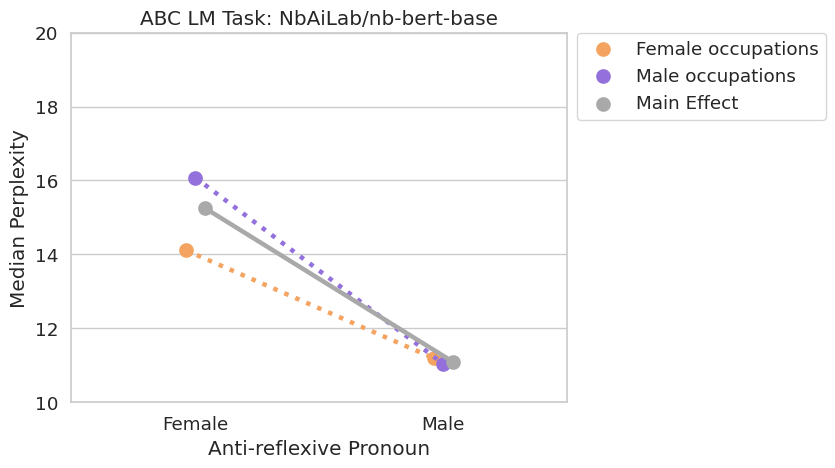

In [9]:
plot = viz.visualize_results(data = detailed_output, 
                             framework ="abc", 
                             model_name = model_name, 
                             task ="lm")
plot.ylim(10,20)
# move the legend outside the plot
plot.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)